# The discrete fourier transform

based on:
    1. https://docs.scipy.org/doc/scipy/tutorial/fft.html#fast-fourier-transforms

# Intro

## DFT formulas

### Analysis
**Analysis** is the process of transforming a signal from time-domain to frequency-domain

$X_{k}=\sum_{n=0}^{N-1}x_n\cdot e^{-i\frac{2\pi}{N}kn}$

* k - base vector index(.. k=2<-->vector number 2 in the orthogonal Fourier basis set)
* n - signal index(..n=2<-->x[2], or the 2nd sample in the signal)

### Synthesis
**Synthesis** is the process of transforming a signal from frequency-domain to time-domain

$ x_n=\frac{1}{N} \sum_{k=0}^{N-1} X_k\cdot e^{i\frac{2\pi}{N}kn}$

* k - base vector index
* n - signal index

### Fourier discrete basis in $C^{N}$

$W_{k}[n]=e^{J\frac{2\pi}{N}\cdot n \cdot\ k}$

* k - base vector index
* n - signal index

#### Fourier basis example
$W_{2}[n]=e^{2 \cdot J\frac{2\pi}{N}\cdot n}=cos(2 \cdot \frac{2\pi}{N}\cdot n) + J\cdot sin(2 \cdot \frac{2\pi}{N}\cdot n)$

### Basis transformation
for 2 orthonormal bases: $\textbf{W}$, $\textbf{V}$.

we can transform some vector $\textbf{x}$ representation in the following way:

$x=\sum_{k=0}^{K-1}\alpha_{k}W^{(k)}=\sum_{k=0}^{K-1}\beta_{k}V^{(k)}$

and **$\alpha$** and **$\beta$**:

$\alpha_{k}=<W^{(k)} , x>$
$\beta_{k}=<V^{(k)} , x>$

* $\textbf{<a , b>}\Longrightarrow$ inner product of $\textbf{a}$ and $\textbf{b}$

### Inner product in $C^{N}$
$<x , y>=\sum_{n=0}^{N-1}x^{*}[n]\cdot y[n]$

### Normalize frequency and system clock
* $T_{s}$ - Clock period
* $F_{s}=\frac{1}{T_{s}}$ - Clock frequency

We know that the fastest frequency possible is one with 2 sample per cycle(see explanation)

$k_{fastest}=\frac{N}{2}$

Thus:

$F_{fastest}=\frac{F_{s}}{2}$

And:

$T_{fastest}=2\cdot T_{s}$

We cant "see" fastest frequencies.

## Example:
will use sum of sines 
* sampled in fs=10[Hz]
* in an interval T=2

$ x[n]=cos(2*fs*N*2\pi)+cos(4*fs*N*2\pi)$

In [1]:
# imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, fftshift


### present signal

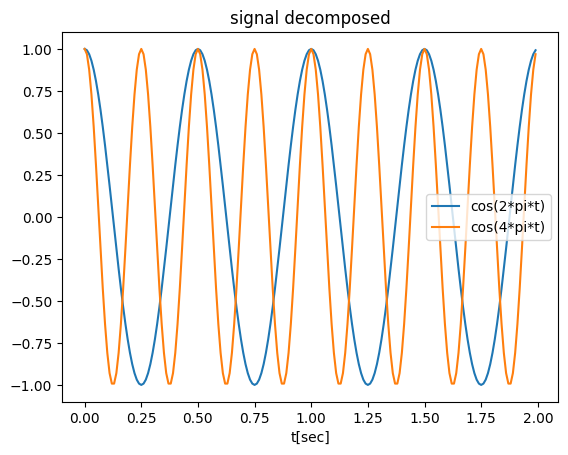

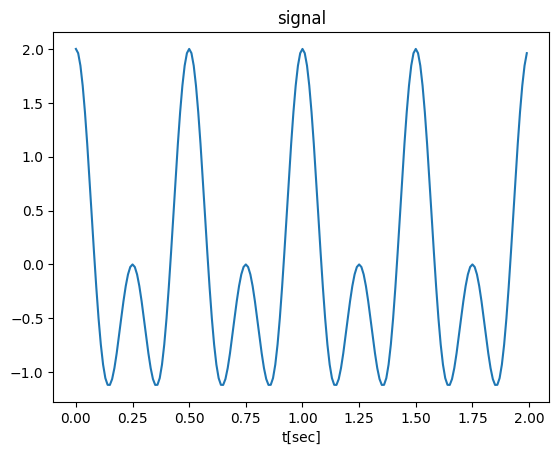

In [2]:
## time interval
T=2

## sampling frequency [Hz]
fs=100

## Number of samples
N=int(T*fs) 

## time vector
t=np.linspace(start=0,stop=T-1/fs,num=N)

## signal, 1 Hz = 2*pi rad/sec
f1,f2=2,4 #[Hz] or [cycle/sec]
w1,w2=f1*2*np.pi,f2*2*np.pi #[rad/sec]

x1=np.cos(t*w1)
x2=np.cos(t*w2)
x_signal=x1+x2

## present signal parts
plt.plot(t,x1,t,x2)
plt.title('signal decomposed')
plt.xlabel('t[sec]')
plt.legend(['cos(2*pi*t)','cos(4*pi*t)'])
plt.show()

## present composed signal 
plt.plot(t,x_signal)
plt.title('signal')
plt.xlabel('t[sec]')
plt.show()

### analize signal with DFT

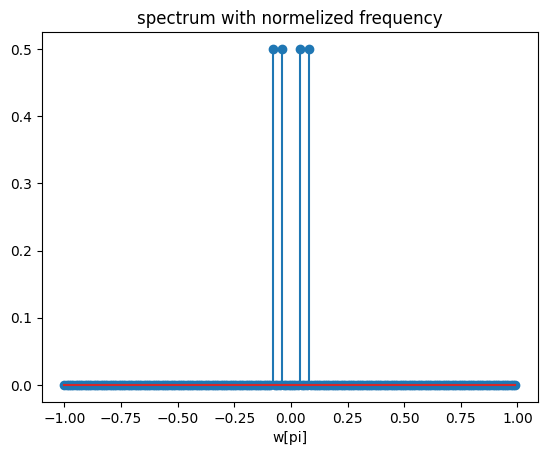

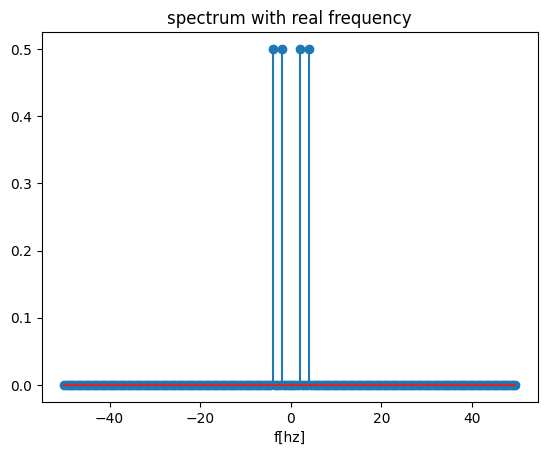

In [3]:
## the frequency vector

### frequency vector length
n=len(x_signal)

### normelized frequency
d=1/(2*np.pi)
fn=fftfreq(n,d)/np.pi

### real frequency
d=1/fs
f=fftfreq(n,d)
## the DFT 
X=fft(x_signal,norm="forward")

## present spectrums
plt.stem(fn,X.real)
plt.title('spectrum with normelized frequency')
plt.xlabel('w[pi]')
# plt.xlim([0,])
plt.show()

plt.stem(f,X.real)
plt.title('spectrum with real frequency')
plt.xlabel('f[hz]')
# plt.xlim([0,5])
plt.show()


### reconstruct the signal with IDFT

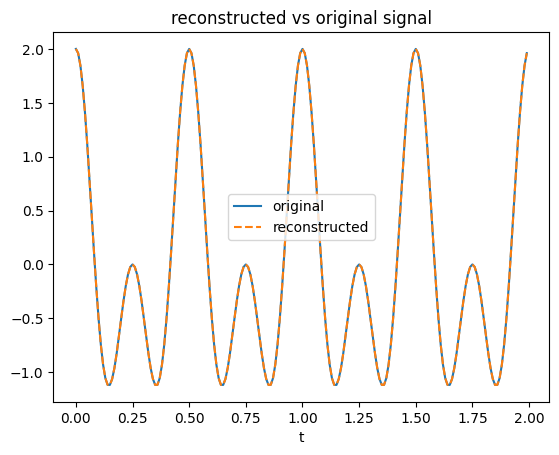

In [4]:
# decompose the signal

## the IDFT 
x_reconstruct=ifft(X,norm="forward")

## present spectrums
plt.plot(t,x_signal,t,x_reconstruct.real,'--')
plt.title('reconstructed vs original signal')
plt.xlabel('t')
plt.legend(['original','reconstructed'])
# plt.xlim([0,])
plt.show()



# Appendix

## cos and time

np.cos(x)
* x in radians

in the case of a series of cosine:

* for fs=10 [hz]: t=[0.1,0.2,0.3,0.4..]
* if the cosine frequency is f1=2[hz]<-->w1=f1*2*np.pi
* for t=0-->cos(0)=1
* for t=0.5-->cos(pi/2)=0
* for t=1-->cos(pi)=-1
the cosine arguments should be:
w[0]=0,w[5]=pi/2...

w=[t*w1]


## fft

scipy.fft.fft(x,norm)
* **x**-input array
* **norm**-normelization method{"beckward","ortho","forward"} 
1. backward-->no normalization, only in the ifft will bw factor of 1/n
2. forward-->exactly the opposite of backward
3. ortho-->both directions factored by  $\frac{1}{\sqrt{n}}$

## fftfreq

scipy.fft.fftfreq(n,d)

* **n**-window length
* **d**-sample spacing
* **f**-frequencys returned

f = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)   if n is even


f = [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)   if n is odd

if d(( is in seconds the frequency unit is in $\frac{cycle}{seconds}$

(dn/1)/(n/2)=2/fs<-->2d=2/fs--->d=1/fs

if (n/2)/(d*n)=pi the frequency unit is in $\frac{2\pi}{fs}$ 



## Ifft

scipy.fft.ifft(x,norm)

* **x**-input signal
* **norm**-normelization method{"beckward","ortho","forward"} 
1. backward-->no normalization, only in the ifft will bw factor of 1/n
2. forward-->exactly the opposite of backward
3. ortho-->both directions factored by  $\frac{1}{\sqrt{n}}$

The input should be ordered in the same way as is returned by fft, i.e.,

* x[0] should contain the zero frequency term,
* x[1:n//2] should contain the positive-frequency terms,
* x[n//2 + 1:] should contain the negative-frequency terms, in increasing order starting from the most negative frequency.